In [17]:
import pandas as pd

debate_transcript_sentiment = pd.read_csv('debate_transcripts_sentiment.csv')

In [18]:
df_pres_debate = debate_transcript_sentiment[(~debate_transcript_sentiment["VP_debate"])&(debate_transcript_sentiment["is_candidate"])]

In [19]:
df_all_debates=debate_transcript_sentiment[debate_transcript_sentiment["is_candidate"]]

In [20]:
df_all_debates

,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent,vader_full,vader_sentiment,vader_label,bert_full,bert_raw,bert_sentiment,bert_label,diff_sentiment
0,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Mr. Smith, Mr. Nixon. In the election of 1860,...",True,Democratic,True,False,False,"{'neg': 0.074, 'neu': 0.758, 'pos': 0.169, 'co...",0.9993,positive,"{'neg': 0.33399999141693115, 'neu': 0.41650000...",-0.084447,-0.167306,negative,1.166606
2,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,"Mr. Smith, Senator Kennedy. The things that Se...",True,Republican,False,False,False,"{'neg': 0.037, 'neu': 0.834, 'pos': 0.129, 'co...",0.9992,positive,"{'neg': 0.2806999981403351, 'neu': 0.409099996...",0.029422,0.058777,positive,0.940423
5,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Well, the Vice President and I came to the Con...",True,Democratic,True,False,False,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.9856,positive,"{'neg': 0.014299999922513962, 'neu': 0.7803999...",0.191015,0.364470,positive,0.621130
7,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,I have no comment.,True,Republican,False,False,False,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.2960,negative,"{'neg': 0.3077999949455261, 'neu': 0.656899988...",-0.272466,-0.496713,negative,0.200713
10,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,It would be rather difficult to cover them in ...,True,Republican,False,False,False,"{'neg': 0.016, 'neu': 0.874, 'pos': 0.11, 'com...",0.9749,positive,"{'neg': 0.09839999675750732, 'neu': 0.82359999...",-0.020330,-0.040637,neutral,1.015537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,2024_Vance_Walz_VP,2024-10-01,2024,Walz,Sorry.,True,Democratic,False,True,False,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.0772,negative,"{'neg': 0.4530999958515167, 'neu': 0.483300000...",-0.389570,-0.652213,negative,0.575013
9923,2024_Vance_Walz_VP,2024-10-01,2024,Vance,That's not fire in a crowded theater. That is ...,True,Republican,True,True,False,"{'neg': 0.106, 'neu': 0.807, 'pos': 0.087, 'co...",-0.1190,negative,"{'neg': 0.5480999946594238, 'neu': 0.428099989...",-0.524199,-0.781183,negative,0.662183
9925,2024_Vance_Walz_VP,2024-10-01,2024,Walz,"Please. Yeah, well, I don't run Facebook. What...",True,Democratic,False,True,False,"{'neg': 0.035, 'neu': 0.849, 'pos': 0.115, 'co...",0.9364,positive,"{'neg': 0.7512000203132629, 'neu': 0.233700007...",-0.736153,-0.900016,negative,1.836416
9928,2024_Vance_Walz_VP,2024-10-01,2024,Walz,"Well, thank you, Senator Vance. Thank you to C...",True,Democratic,False,True,False,"{'neg': 0.038, 'neu': 0.756, 'pos': 0.206, 'co...",0.9972,positive,"{'neg': 0.012600000016391277, 'neu': 0.0891999...",0.885657,0.943753,positive,0.053447


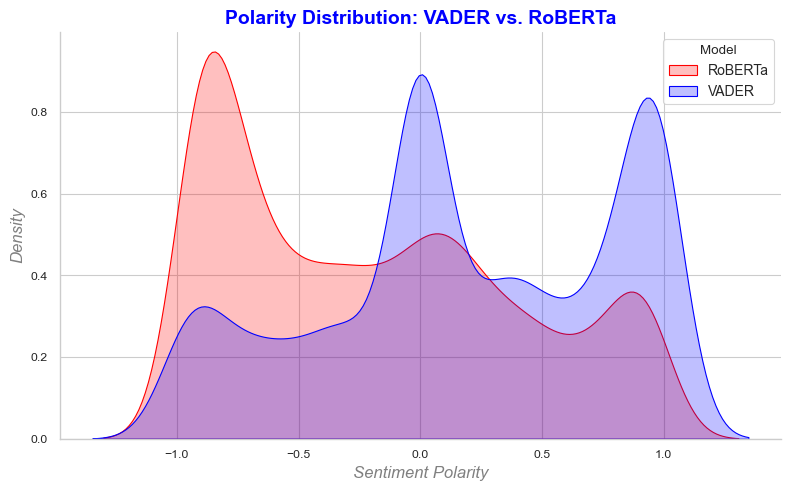

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid", palette="colorblind", context="paper")

# KDE plot for RoBERTa and VADER
sns.kdeplot(df_pres_debate["bert_sentiment"], color="red", fill=True, label="RoBERTa")
sns.kdeplot(df_pres_debate["vader_sentiment"], color="blue", fill=True, label="VADER")

# Plot formatting
plt.xlabel("Sentiment Polarity", fontsize=12, fontstyle="italic", color="gray")
plt.ylabel("Density", fontsize=12, fontstyle="italic", color="gray")
plt.title("Polarity Distribution: VADER vs. RoBERTa", fontsize=14, weight="bold", color="blue")
plt.legend(title="Model", fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

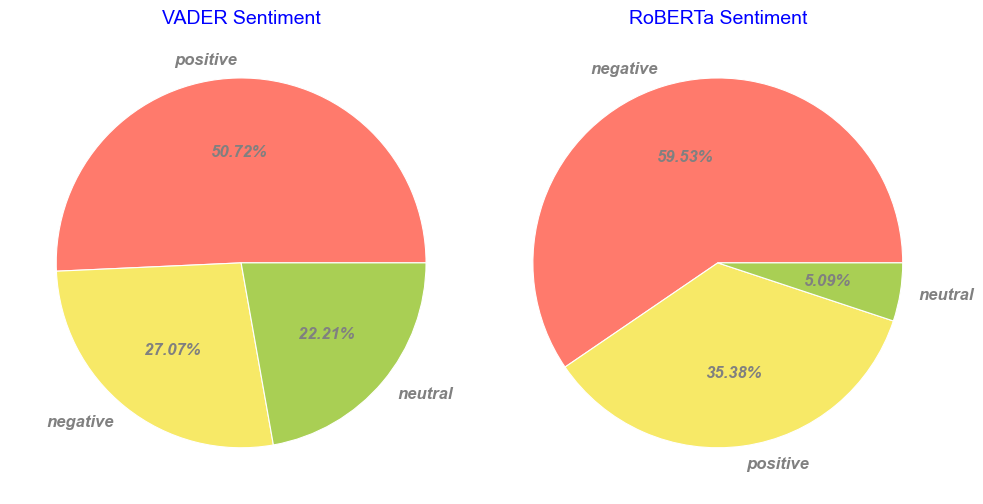

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

colors = ["#ff7a6c", "#F7E967", "#A9CF54"]
textprops = dict(fontsize=12, fontstyle="italic", weight="bold", color="gray")

# VADER pie chart
df_pres_debate["vader_label"].value_counts(normalize=True).plot.pie(
    ax=axes[0], autopct="%.2f%%", colors=colors, textprops=textprops, ylabel=""
)
axes[0].set_title("VADER Sentiment", fontsize=14, color="blue")

# RoBERTa pie chart
df_pres_debate["bert_label"].value_counts(normalize=True).plot.pie(
    ax=axes[1], autopct="%.2f%%", colors=colors, textprops=textprops, ylabel=""
)
axes[1].set_title("RoBERTa Sentiment", fontsize=14, color="blue")

plt.tight_layout()
plt.show()


### Models by Party

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\2644799410.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text() for label in xticklabels], rotation=90)


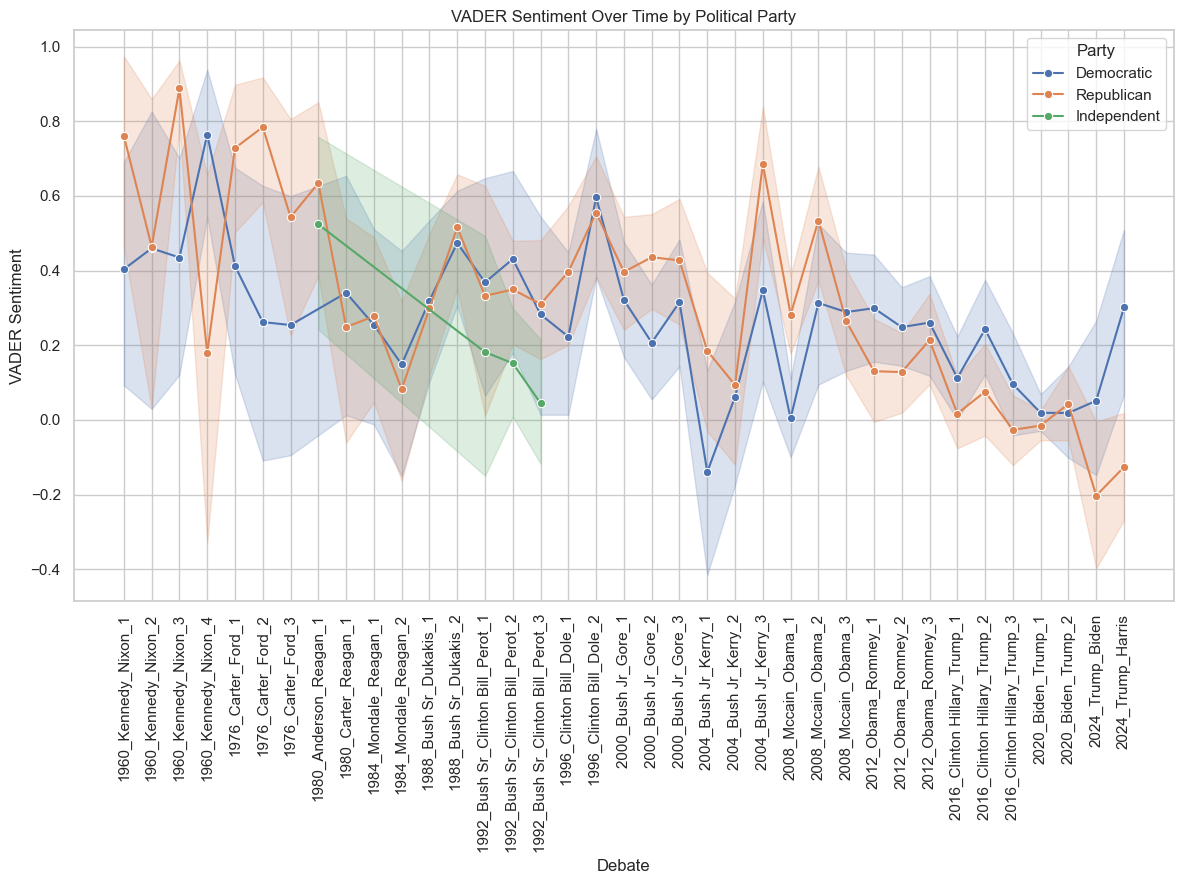

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 9))
ax = sns.lineplot(data=df_pres_debate, x='debate_title', y='vader_sentiment', hue='party', marker='o')

# Set title and labels
plt.title('VADER Sentiment Over Time by Political Party')
plt.xlabel('Debate')
plt.ylabel('VADER Sentiment')
plt.legend(title='Party')

# Modify x-axis ticks to show only every 4th label
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
ax.set_xticklabels([label.get_text() for label in xticklabels], rotation=90)

plt.tight_layout()
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\3739708056.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text() for label in xticklabels], rotation=90)


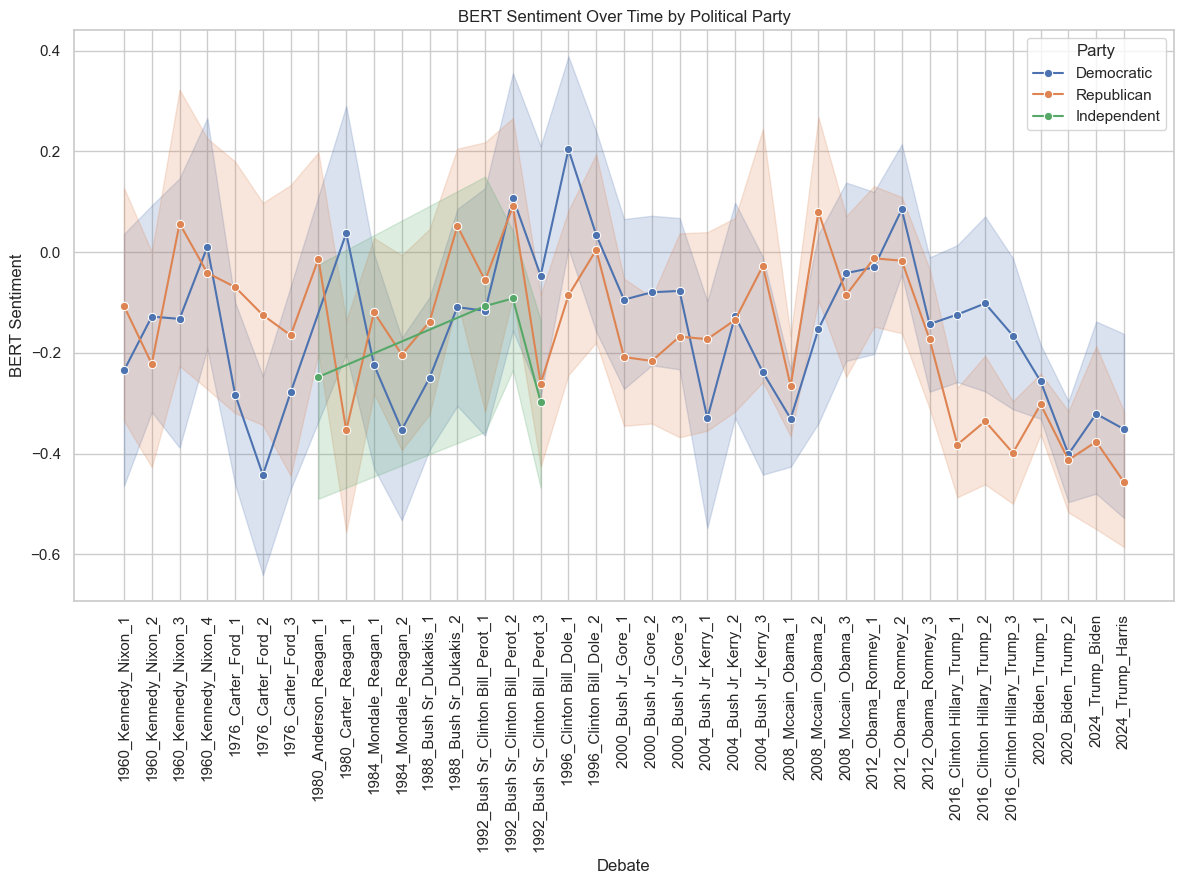

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 9))
ax = sns.lineplot(data=df_pres_debate, x='debate_title', y='bert_sentiment', hue='party', marker='o')

# Set title and labels
plt.title('BERT Sentiment Over Time by Political Party')
plt.xlabel('Debate')
plt.ylabel('BERT Sentiment')
plt.legend(title='Party')

# Modify x-axis ticks to show only every 4th label
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
ax.set_xticklabels([label.get_text() for label in xticklabels], rotation=90)


plt.tight_layout()
plt.show()

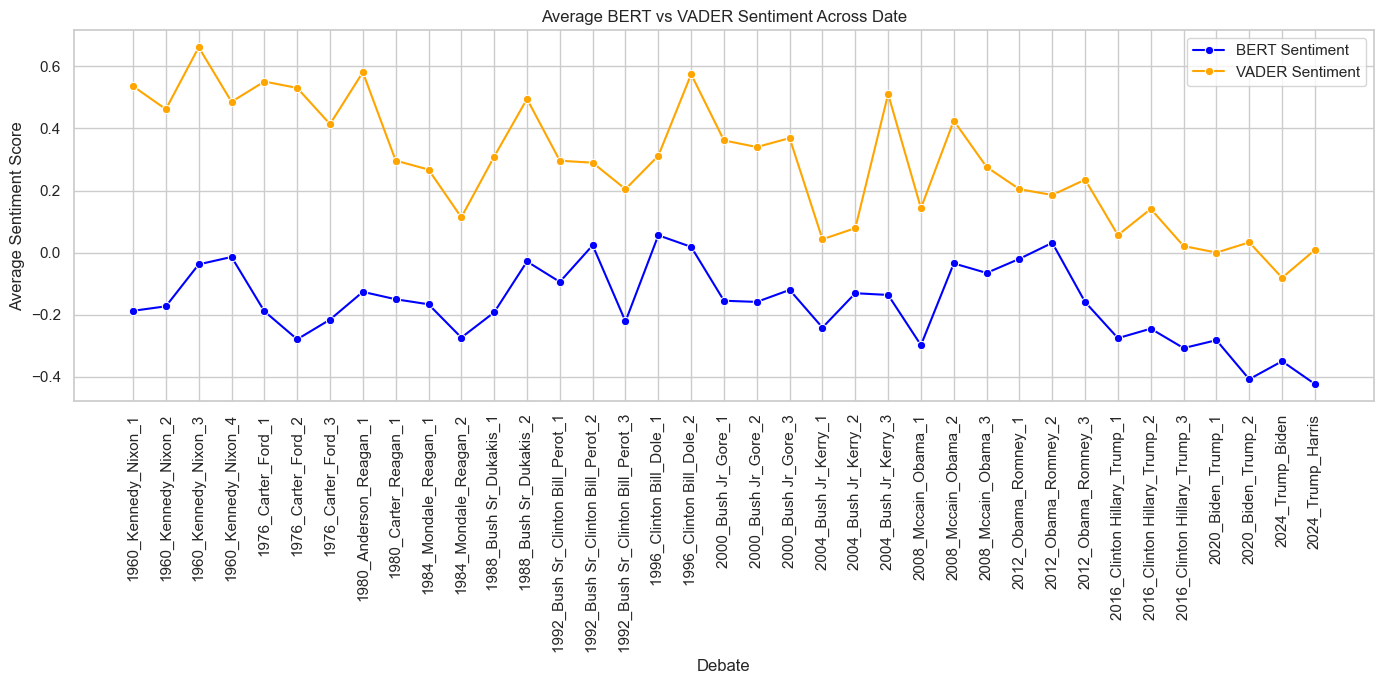

In [25]:
plt.figure(figsize=(14, 7))

# Calculate average sentiment per date
avg_sentiment = df_pres_debate.groupby('debate_title')[['bert_sentiment', 'vader_sentiment']].mean().reset_index()

sns.lineplot(
    data=avg_sentiment,
    x='debate_title',
    y='bert_sentiment',
    label='BERT Sentiment',
    color='blue',
    marker='o'
)
sns.lineplot(
    data=avg_sentiment,
    x='debate_title',
    y='vader_sentiment',
    label='VADER Sentiment',
    color='orange',
    marker='o'
)

plt.title('Average BERT vs VADER Sentiment Across Date')
plt.xlabel('Debate')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Models by Incumbent/Non-Incumbent & Winner/Loser

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\2884074730.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_pres_debate, x='year', y='vader_sentiment', hue='is_incumbent', ci=None, marker='o')


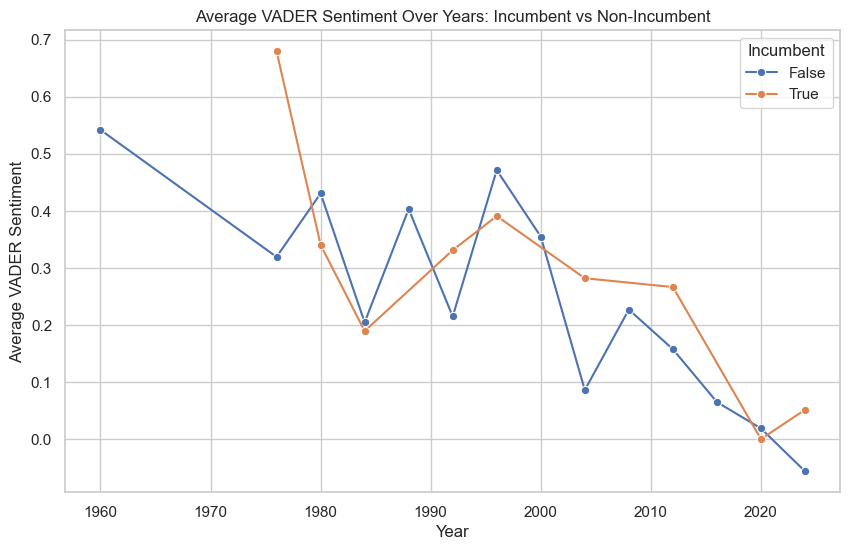

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pres_debate, x='year', y='vader_sentiment', hue='is_incumbent', ci=None, marker='o')
plt.title('Average VADER Sentiment Over Years: Incumbent vs Non-Incumbent')
plt.xlabel('Year')
plt.ylabel('Average VADER Sentiment')
plt.legend(title='Incumbent')
plt.grid(True)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\3573977081.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_pres_debate, x='year', y='bert_sentiment', hue='is_incumbent', ci=None, marker='o')


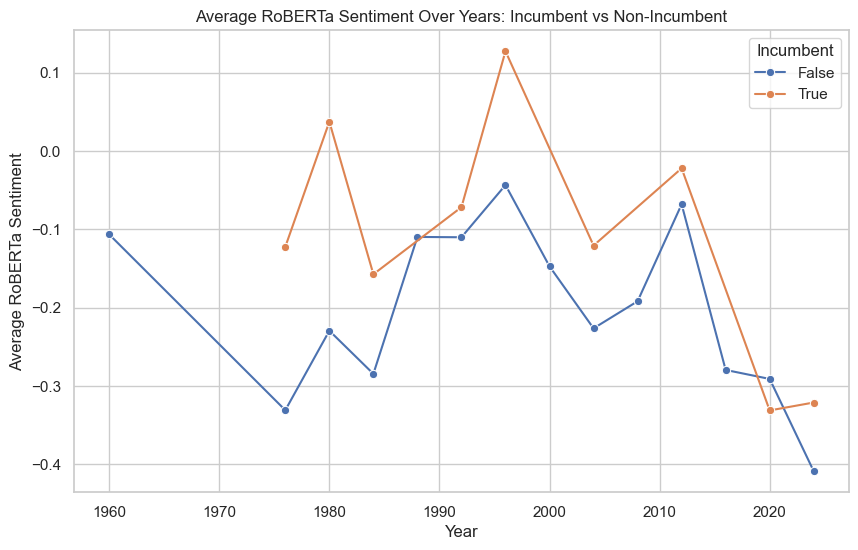

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pres_debate, x='year', y='bert_sentiment', hue='is_incumbent', ci=None, marker='o')
plt.title('Average RoBERTa Sentiment Over Years: Incumbent vs Non-Incumbent')
plt.xlabel('Year')
plt.ylabel('Average RoBERTa Sentiment')
plt.legend(title='Incumbent')
plt.grid(True)
plt.show()


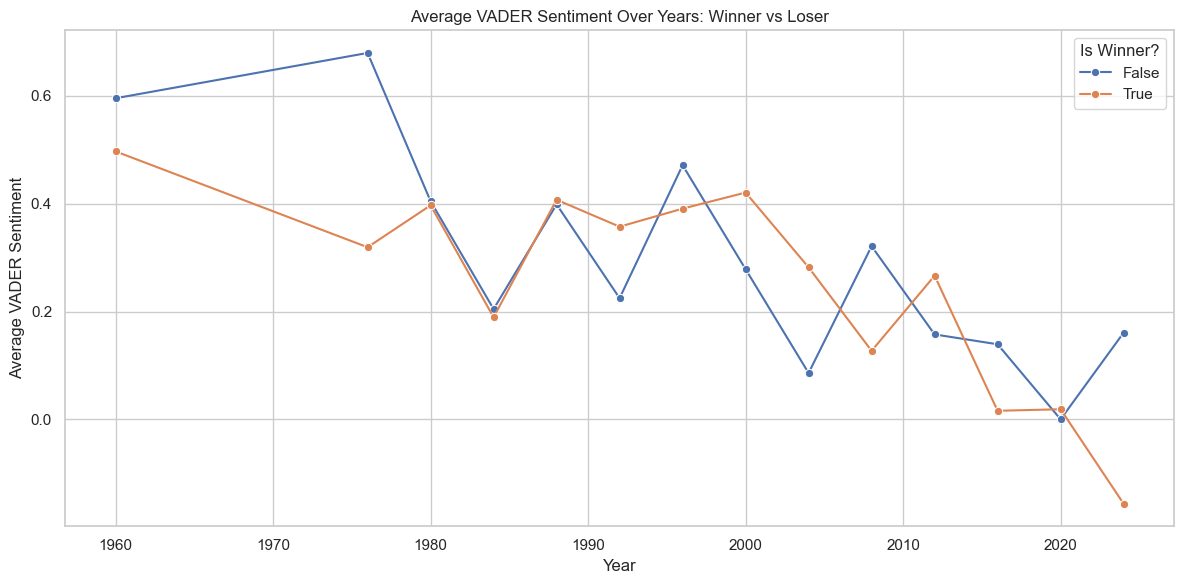

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pres_debate, x='year', y='vader_sentiment', hue='is_winner', errorbar=None, marker ='o')
plt.title('Average VADER Sentiment Over Years: Winner vs Loser')
plt.xlabel('Year')
plt.ylabel('Average VADER Sentiment')
plt.legend(title='Is Winner?')
plt.grid(True)
plt.tight_layout()
plt.show()


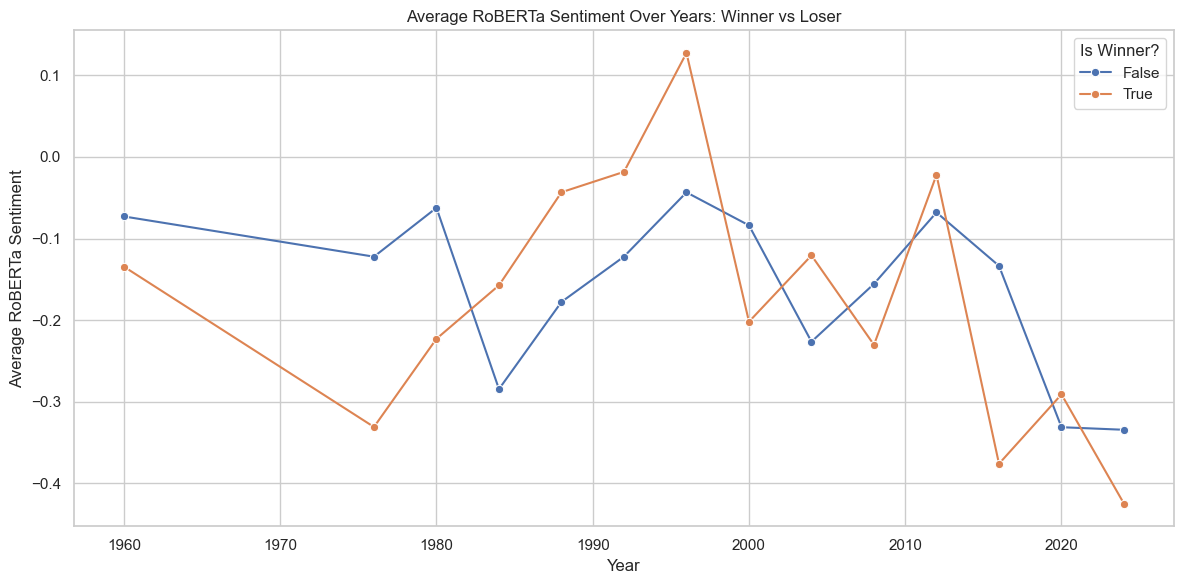

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pres_debate, x='year', y='bert_sentiment', hue='is_winner', errorbar=None, marker ='o')
plt.title('Average RoBERTa Sentiment Over Years: Winner vs Loser')
plt.xlabel('Year')
plt.ylabel('Average RoBERTa Sentiment')
plt.legend(title='Is Winner?')
plt.grid(True)
plt.tight_layout()
plt.show()

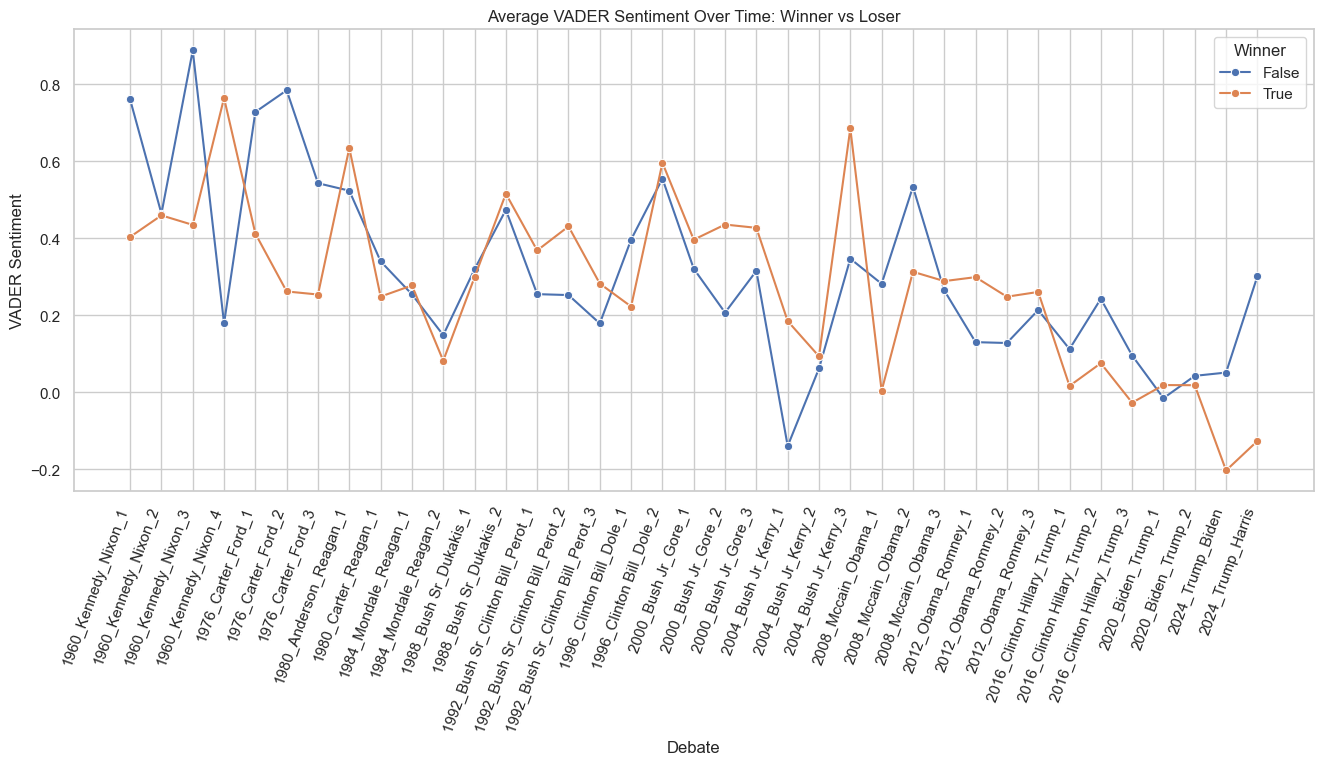

In [30]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_pres_debate, x='debate_title', y='vader_sentiment', hue='is_winner', errorbar=None, marker ='o')
plt.title('Average VADER Sentiment Over Time: Winner vs Loser')
plt.xlabel('Debate')
plt.ylabel('VADER Sentiment')
plt.legend(title='Winner')
plt.xticks(rotation=70, ha='right')
plt.grid(True)
plt.show()

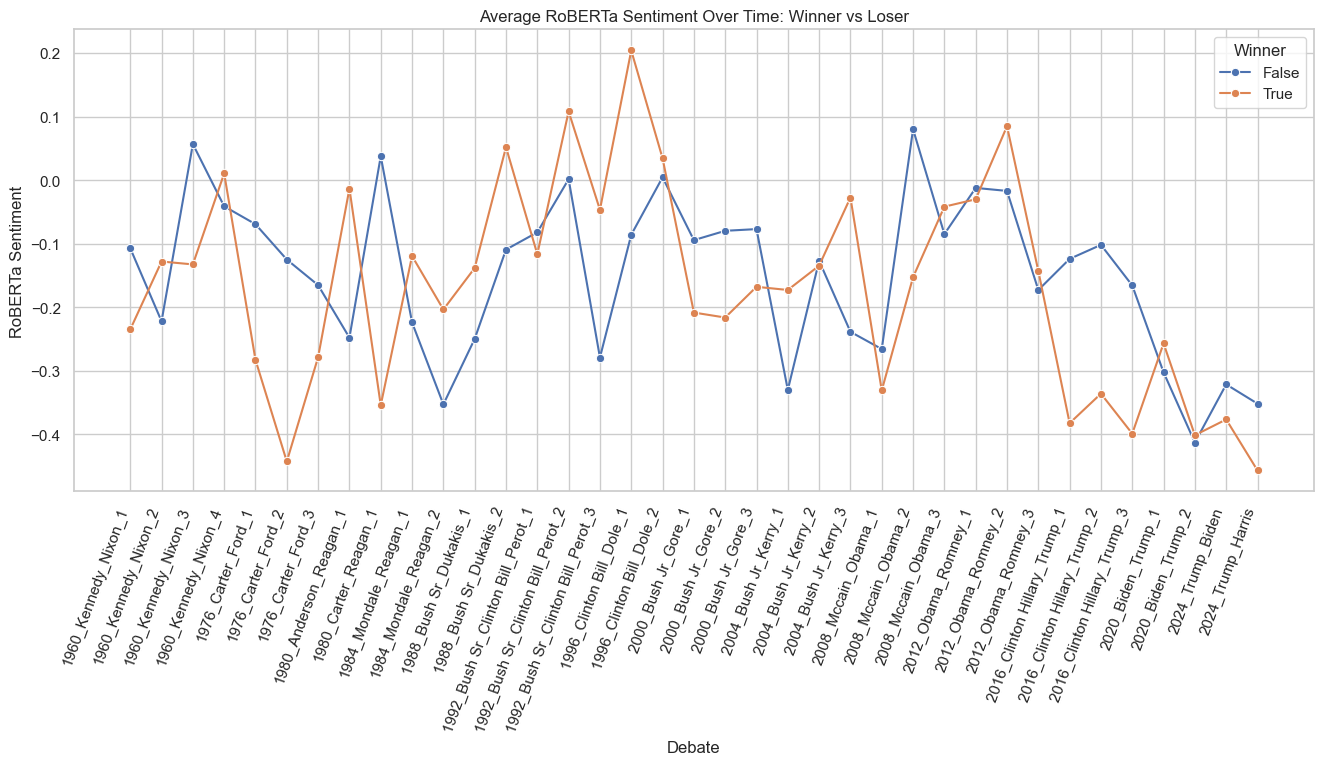

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_pres_debate, x='debate_title', y='bert_sentiment', hue='is_winner', errorbar=None, marker ='o')
plt.title('Average RoBERTa Sentiment Over Time: Winner vs Loser')
plt.xlabel('Debate')
plt.ylabel('RoBERTa Sentiment')
plt.legend(title='Winner')
plt.xticks(rotation=70, ha='right')
plt.grid(True)
plt.show()

### Sentiment Analysis per Candidate

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\10036582.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


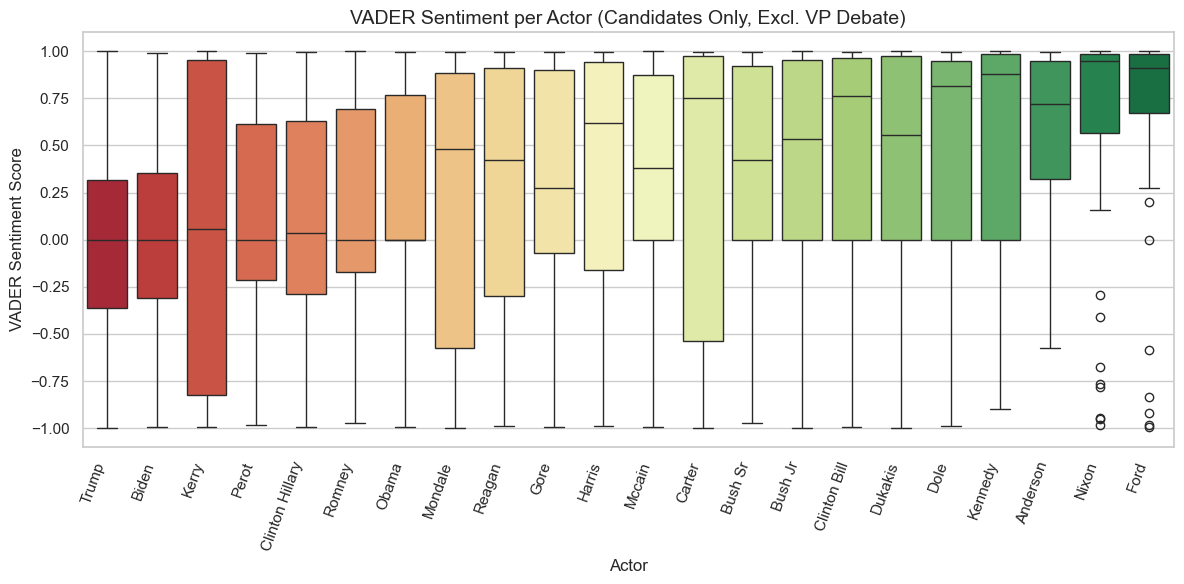

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate mean sentiment per actor for ordering
mean_sentiment = df_pres_debate.groupby('actor')['vader_sentiment'].mean().sort_values()

# Set the order of actors based on mean sentiment
actor_order = mean_sentiment.index

# Set the plot size and style
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(
    data=df_pres_debate,
    x='actor',
    y='vader_sentiment',
    order=actor_order,
    palette='RdYlGn'
)

# Customize the plot
plt.title('VADER Sentiment per Actor (Candidates Only, Excl. VP Debate)', fontsize=14)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('VADER Sentiment Score', fontsize=12)
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_23736\1987456836.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


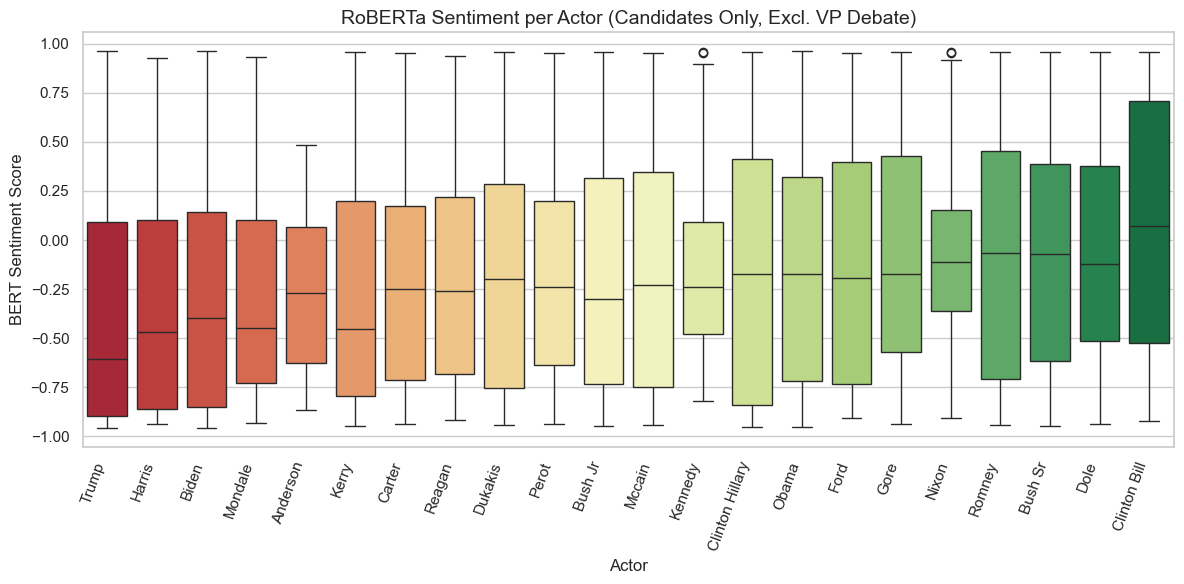

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate mean sentiment per actor for ordering
mean_sentiment = df_pres_debate.groupby('actor')['bert_sentiment'].mean().sort_values()

# Set the order of actors based on mean sentiment
actor_order = mean_sentiment.index

# Set the plot size and style
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(
    data=df_pres_debate,
    x='actor',
    y='bert_sentiment',
    order=actor_order,
    palette='RdYlGn'
)

# Customize the plot
plt.title('RoBERTa Sentiment per Actor (Candidates Only, Excl. VP Debate)', fontsize=14)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('BERT Sentiment Score', fontsize=12)
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

plt.show()

### Sentiment Analysis of Trump Debates
#### Models Comparison (not necessary really?)

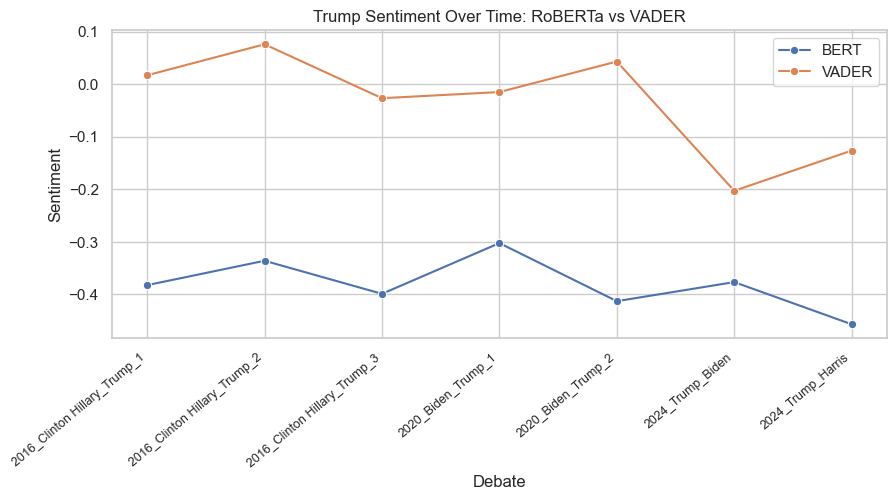

In [34]:
trump_df = df_pres_debate[df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False)]
plt.figure(figsize=(10, 4))
sns.lineplot(data=trump_df, x='debate_title', y='bert_sentiment', label='BERT', marker='o', errorbar=None)
sns.lineplot(data=trump_df, x='debate_title', y='vader_sentiment', label='VADER', marker='o', errorbar=None)
plt.title('Trump Sentiment Over Time: RoBERTa vs VADER')
plt.xlabel('Debate')
plt.ylabel('Sentiment')
plt.xticks(rotation=40, ha='right', size=9)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\2229639908.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trump_df['bert_sentiment'], label='RoBERTa', shade=True, color='red')
C:\Users\danie\AppData\Local\Temp\ipykernel_23736\2229639908.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trump_df['vader_sentiment'], label='VADER', shade=True, color='blue')


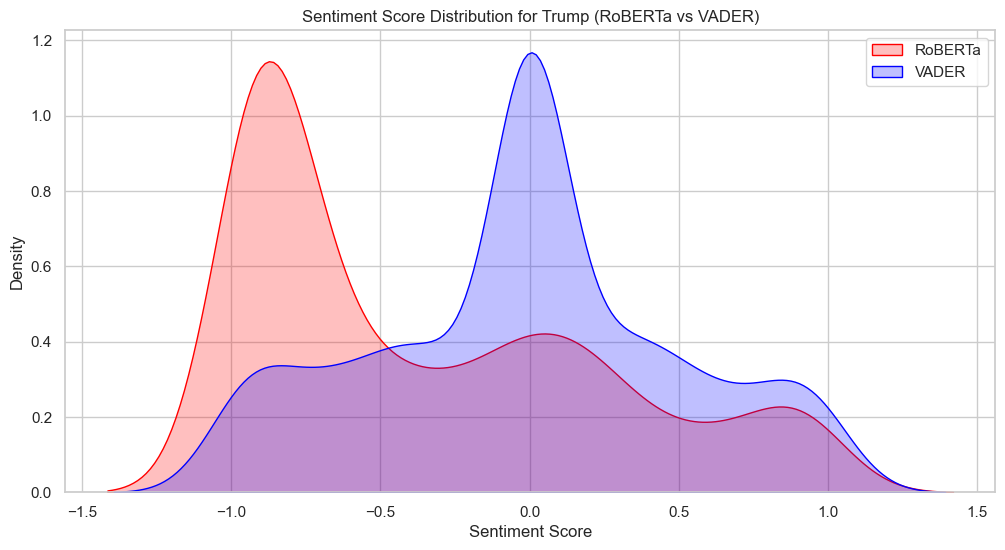

In [35]:
plt.figure(figsize=(12, 6))
sns.kdeplot(trump_df['bert_sentiment'], label='RoBERTa', shade=True, color='red')
sns.kdeplot(trump_df['vader_sentiment'], label='VADER', shade=True, color='blue')
plt.title("Sentiment Score Distribution for Trump (RoBERTa vs VADER)")
plt.xlabel("Sentiment Score")
plt.legend()
plt.grid(True)
plt.show()

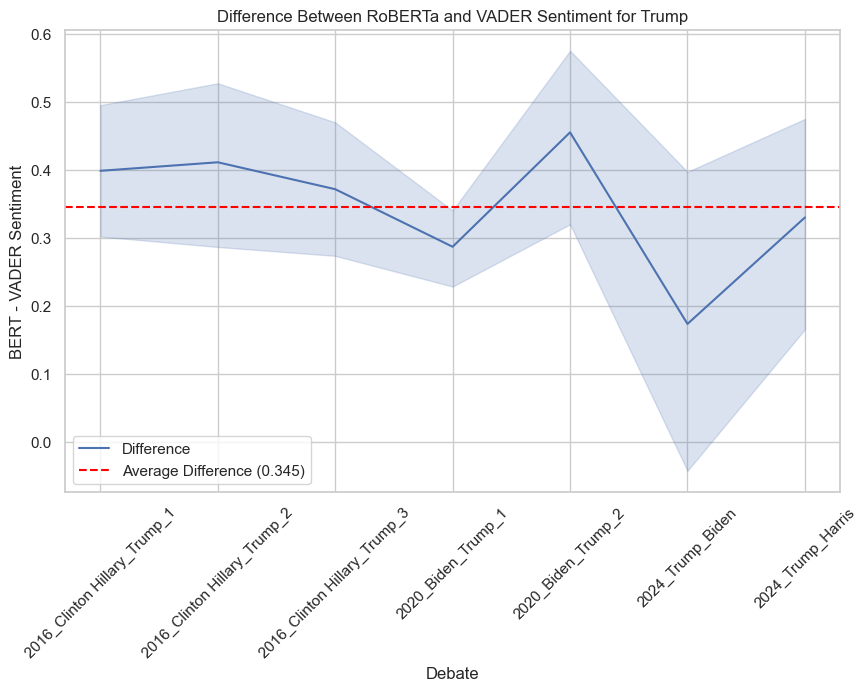

In [36]:
# Calculate the average sentiment difference between BERT and VADER for Trump
avg_diff = trump_df['diff_sentiment'].mean()

# Plotting the difference with an average line
plt.figure(figsize=(10, 6))
sns.lineplot(data=trump_df, x='debate_title', y='diff_sentiment', label='Difference', errorbar=('ci', 95))
plt.axhline(avg_diff, color='red', linestyle='--', label=f'Average Difference ({avg_diff:.3f})')
plt.title("Difference Between RoBERTa and VADER Sentiment for Trump")
plt.xlabel("Debate")
plt.ylabel("BERT - VADER Sentiment")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x1000 with 0 Axes>

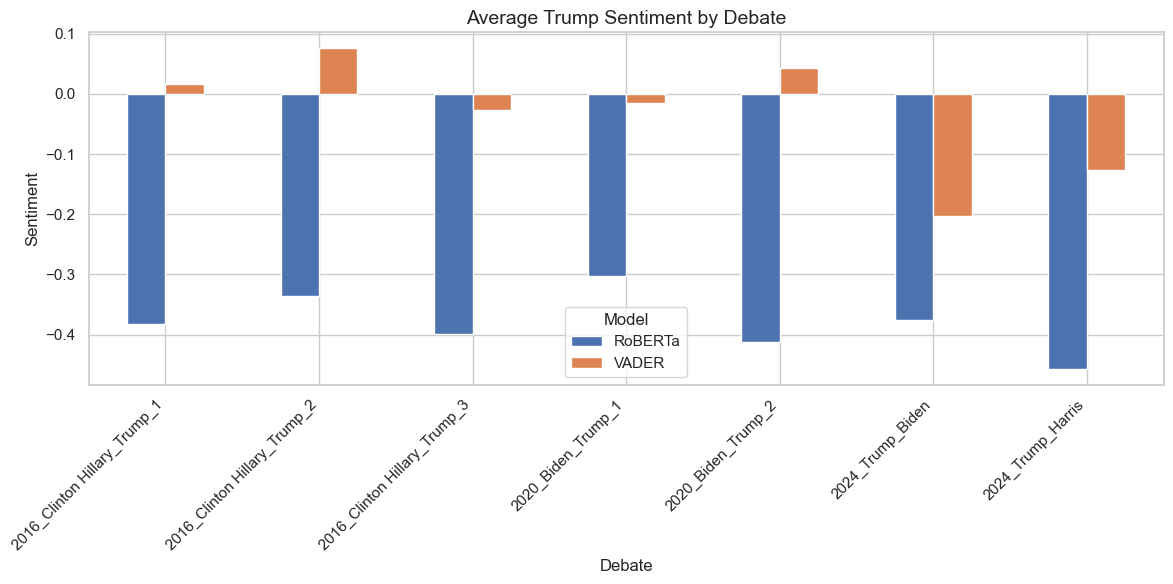

In [37]:
plt.figure(figsize=(14, 10))
debate_avg = trump_df.groupby('debate_title')[['bert_sentiment', 'vader_sentiment']].mean().reset_index()
debate_avg = debate_avg.sort_values(by='debate_title', ascending=True)
debate_avg.plot(kind='bar', x='debate_title', figsize=(12,6), stacked=False)
plt.title("Average Trump Sentiment by Debate", size=14)
plt.ylabel("Sentiment")
plt.xlabel("Debate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.legend(title='Model', labels=['RoBERTa', 'VADER'])
plt.show()

#### Trump vs Others

C:\Users\danie\AppData\Local\Temp\ipykernel_23736\4132020738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pres_debate['group'] = 'All Candidates'
C:\Users\danie\AppData\Local\Temp\ipykernel_23736\4132020738.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grouped, x='group', y='vader_sentiment', palette=custom_palette, ax=axes[0])
C:\Users\danie\AppData\Local\Temp\ipykernel_23736\4132020738.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


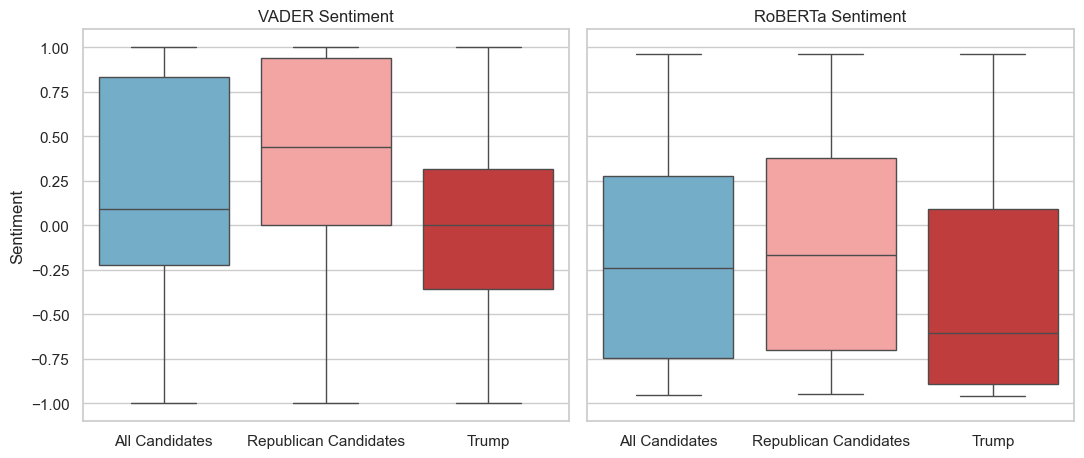

In [38]:
# Assign exclusive groups
df_pres_debate['group'] = 'All Candidates'
df_pres_debate.loc[df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False), 'group'] = 'Trump'
df_pres_debate.loc[
    (df_pres_debate['party'].str.upper() == 'REPUBLICAN') &
    (~df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False)),
    'group'
] = 'Republican Candidates'

# Filter relevant rows
df_grouped = df_pres_debate[df_pres_debate['group'].isin(['Trump', 'Republican Candidates', 'All Candidates'])]

# Color palette
custom_palette = {
    'All Candidates': '#66b2d6',
    'Republican Candidates': '#ff9896',
    'Trump': '#d62728'
}

# Create side-by-side box plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5), sharey=True)

# VADER (left)
sns.boxplot(data=df_grouped, x='group', y='vader_sentiment', palette=custom_palette, ax=axes[0])
axes[0].set_title('VADER Sentiment')
axes[0].set_xlabel('')
axes[0].set_ylabel('Sentiment')
axes[0].grid(True, axis='y')

# RoBERTa (right)
sns.boxplot(data=df_grouped, x='group', y='bert_sentiment', palette=custom_palette, ax=axes[1])
axes[1].set_title('RoBERTa Sentiment')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].grid(True, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

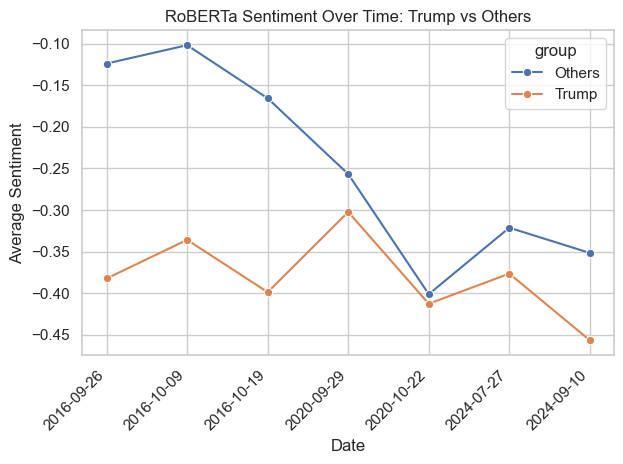

In [39]:
trump_years = df_pres_debate[df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False)]['year'].unique()
df_pres_debate = df_pres_debate[df_pres_debate['year'].isin(trump_years)].copy()
df_pres_debate['is_trump'] = df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False)

df_pres_debate['group'] = df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False).map({True: 'Trump', False: 'Others'})
time_sentiment = df_pres_debate.groupby(['date', 'group'])[['vader_sentiment', 'bert_sentiment']].mean().reset_index()

sns.lineplot(data=time_sentiment, x='date', y='bert_sentiment', hue='group', marker='o')
plt.title("RoBERTa Sentiment Over Time: Trump vs Others")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

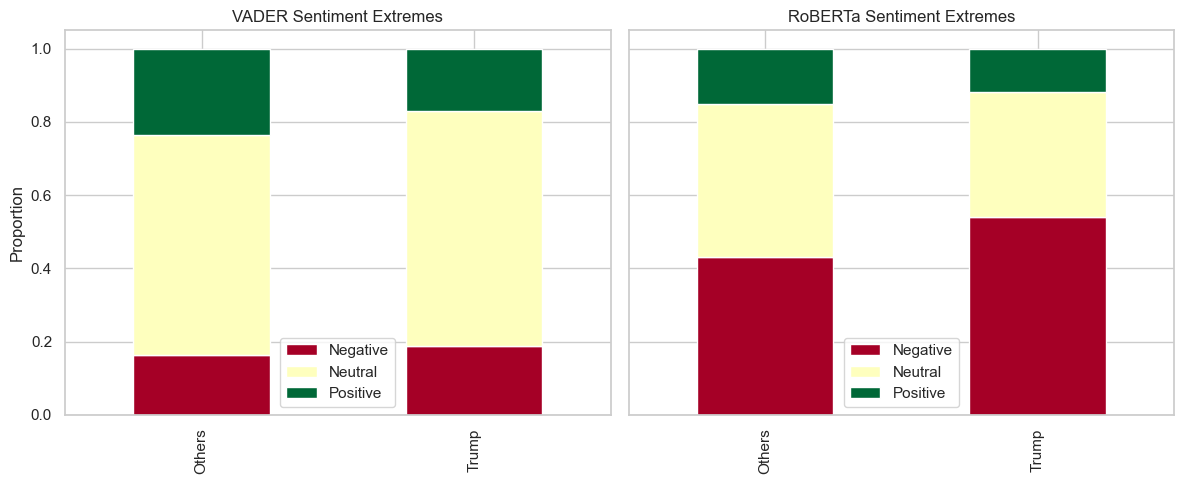

In [40]:
df_pres_debate['group'] = df_pres_debate['actor'].str.contains("TRUMP", case=False, na=False).map({True: 'Trump', False: 'Others'})

# Tag sentiment extremes
df_pres_debate['vader_extreme'] = df_pres_debate['vader_sentiment'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative' if x < -0.5 else 'Neutral')
df_pres_debate['bert_extreme'] = df_pres_debate['bert_sentiment'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative' if x < -0.5 else 'Neutral')

# Proportions per group
extreme_vader = df_pres_debate.groupby(['group', 'vader_extreme']).size().unstack().fillna(0)
extreme_vader = extreme_vader.div(extreme_vader.sum(axis=1), axis=0)

extreme_bert = df_pres_debate.groupby(['group', 'bert_extreme']).size().unstack().fillna(0)
extreme_bert = extreme_bert.div(extreme_bert.sum(axis=1), axis=0)

# Plotting
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# VADER plot
extreme_vader.plot(kind='bar', stacked=True, colormap='RdYlGn', ax=axes[0])
axes[0].set_title("VADER Sentiment Extremes")
axes[0].set_ylabel("Proportion")
axes[0].set_xlabel("")
axes[0].legend()

# BERT plot
extreme_bert.plot(kind='bar', stacked=True, colormap='RdYlGn', ax=axes[1])
axes[1].set_title("RoBERTa Sentiment Extremes")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].legend()

plt.tight_layout()
plt.show()